# Making plots visualizing the model performance

In [2]:
%load_ext autoreload
%autoreload 2
import joblib 
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
from colorml.utils.utils import plot_prediction_dist, read_pickle, pairwise_delta_es

%matplotlib inline




Using TensorFlow backend.


In [3]:
model_median = joblib.load('/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/regressor_medianrun_2020_09_10_13_19_1599736778False.joblib')
model_01 = joblib.load('/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/regressor_0_1run_2020_09_10_13_19_1599736778False.joblib')
model_09 = joblib.load('/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/regressor_0_9run_2020_09_10_13_19_1599736778False.joblib')
#model_mean = joblib.load('../results/gbm/regressor_meanrun_2020_06_08_12_59_1591613951.joblib')

X_test = np.load('/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/X_test_run_2020_09_10_13_19_1599736778.npy')
X_train = np.load('/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/X_train_run_2020_09_10_13_19_1599736778.npy')
y_train = np.load('/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/y_train_run_2020_09_10_13_19_1599736778.npy')
y_test = np.load('/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/y_test_run_2020_09_10_13_19_1599736778.npy')
names = np.load('/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/y_names_run_2020_09_10_13_19_1599736778.npy', allow_pickle=True)

scaler = joblib.load('/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/scaler_run_2020_09_10_13_19_1599736778.joblib')

In [4]:
CHEMICAL_FEATURES = [
    "mc_CRY-chi-0-all",
    "mc_CRY-chi-1-all",
    "mc_CRY-chi-2-all",
    "mc_CRY-chi-3-all",
    "mc_CRY-Z-0-all",
    "mc_CRY-Z-1-all",
    "mc_CRY-Z-2-all",
    "mc_CRY-Z-3-all",
    "mc_CRY-I-1-all",
    "mc_CRY-I-2-all",
    "mc_CRY-I-3-all",
    "mc_CRY-T-0-all",
    "mc_CRY-T-1-all",
    "mc_CRY-T-2-all",
    "mc_CRY-T-3-all",
    "mc_CRY-S-0-all",
    "mc_CRY-S-1-all",
    "mc_CRY-S-2-all",
    "mc_CRY-S-3-all",
    "D_mc_CRY-chi-1-all",
    "D_mc_CRY-chi-2-all",
    "D_mc_CRY-chi-3-all",
    "D_mc_CRY-Z-1-all",
    "D_mc_CRY-Z-2-all",
    "D_mc_CRY-Z-3-all",
    "D_mc_CRY-T-1-all",
    "D_mc_CRY-T-2-all",
    "D_mc_CRY-T-3-all",
    "D_mc_CRY-S-1-all",
    "D_mc_CRY-S-2-all",
    "D_mc_CRY-S-3-all",
    "func-chi-0-all",
    "func-chi-1-all",
    "func-chi-2-all",
    "func-chi-3-all",
    "func-Z-0-all",
    "func-Z-1-all",
    "func-Z-2-all",
    "func-Z-3-all",
    "func-I-1-all",
    "func-I-2-all",
    "func-I-3-all",
    "func-T-0-all",
    "func-T-1-all",
    "func-T-2-all",
    "func-T-3-all",
    "func-S-0-all",
    "func-S-1-all",
    "func-S-2-all",
    "func-S-3-all",
    "func-alpha-0-all",
    "func-alpha-1-all",
    "func-alpha-2-all",
    "func-alpha-3-all",
    "D_func-chi-1-all",
    "D_func-chi-2-all",
    "D_func-chi-3-all",
    "D_func-Z-1-all",
    "D_func-Z-2-all",
    "D_func-Z-3-all",
    "D_func-T-1-all",
    "D_func-T-2-all",
    "D_func-T-3-all",
    "D_func-S-2-all",
    "D_func-S-3-all",
    "D_func-alpha-1-all",
    "D_func-alpha-2-all",
    "D_func-alpha-3-all",
    "f-lig-chi-0",
    "f-lig-chi-1",
    "f-lig-chi-2",
    "f-lig-chi-3",
    "f-lig-Z-0",
    "f-lig-Z-1",
    "f-lig-Z-2",
    "f-lig-Z-3",
    "f-lig-I-0",
    "f-lig-I-1",
    "f-lig-I-2",
    "f-lig-I-3",
    "f-lig-T-0",
    "f-lig-T-1",
    "f-lig-T-2",
    "f-lig-T-3",
    "f-lig-S-0",
    "f-lig-S-1",
    "f-lig-S-2",
    "f-lig-S-3",
    "lc-chi-0-all",
    "lc-chi-1-all",
    "lc-chi-2-all",
    "lc-chi-3-all",
    "lc-Z-0-all",
    "lc-Z-1-all",
    "lc-Z-2-all",
    "lc-Z-3-all",
    "lc-I-2-all",
    "lc-I-3-all",
    "lc-T-0-all",
    "lc-T-1-all",
    "lc-T-2-all",
    "lc-T-3-all",
    "lc-S-3-all",
    "lc-alpha-0-all",
    "lc-alpha-1-all",
    "lc-alpha-2-all",
    "lc-alpha-3-all",
    "D_lc-chi-2-all",
    "D_lc-chi-3-all",
    "D_lc-Z-1-all",
    "D_lc-Z-2-all",
    "D_lc-Z-3-all",
    "D_lc-T-1-all",
    "D_lc-T-2-all",
    "D_lc-T-3-all",
    "D_lc-alpha-1-all",
    "D_lc-alpha-2-all",
    "D_lc-alpha-3-all",
    "tertiary_amide_sum",
    "ester_sum",
    "carbonyl_sum",
    "logP_sum",
    "MR_sum",
    "aromatic_rings_sum",
    "dbonds_sum",
    "abonds_sum",
    "tertiary_amide_mean",
    "ester_mean",
    "carbonyl_mean",
    "logP_mean",
    "MR_mean",
    "aromatic_rings_mean",
    "dbonds_mean",
    "abonds_mean",
]

In [5]:
df = pd.read_csv('../data/color_feat_merged.csv')

In [6]:
X = df[CHEMICAL_FEATURES] 

In [7]:
X_scaled = scaler.transform(X)

In [8]:
test_indices_in_df = []

for i, x in enumerate(X_test):
    test_indices_in_df.append(np.argmin(np.sum(np.abs(X_scaled - x), axis=1)))

In [9]:
train_indices_in_df = []

for i, x in enumerate(X_train):
    train_indices_in_df.append(np.argmin(np.sum(np.abs(X_scaled - x), axis=1)))

In [10]:
train_names = df['color_cleaned_x'][train_indices_in_df].values

In [11]:
train_refcodes = df['refcode'][train_indices_in_df].values

In [12]:
test_names =  df['color_cleaned_x'][test_indices_in_df].values

In [13]:
'KAJZIH' in train_refcodes

True

In [14]:
df[df['refcode'] == 'KAJZIH']

,Unnamed: 0,mc_CRY-chi-0-all,mc_CRY-chi-1-all,mc_CRY-chi-2-all,mc_CRY-chi-3-all,mc_CRY-Z-0-all,mc_CRY-Z-1-all,mc_CRY-Z-2-all,mc_CRY-Z-3-all,mc_CRY-I-0-all,...,sum-D_func-alpha-2-all,sum-D_func-alpha-3-all,color_cleaned_x,refcode,color_string,delta_t_seconds,r,g,b,color_cleaned_y
4387,4387,3.61,19.608,14.535,34.143,841.0,696.0,522.0,1218.0,1.0,...,0.0,0.0,dark green,KAJZIH,dark green,14.282838,10.0,87.0,18.0,dark green


In [15]:
quantile01_prediction = model_01.predict(X_test)
quantile09_prediction = model_09.predict(X_test)

median_prediction = model_median.predict(X_test)

#mean_prediction = model_mean.predict(X_test)

In [16]:
quantile01_prediction_train = model_01.predict(X_train)
quantile09_prediction_train = model_09.predict(X_train)
median_prediction_train = model_median.predict(X_train)


In [35]:
augmentation_dict = read_pickle('../data/augment_dict.pkl')

/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/colorml/utils/utils.py:409: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


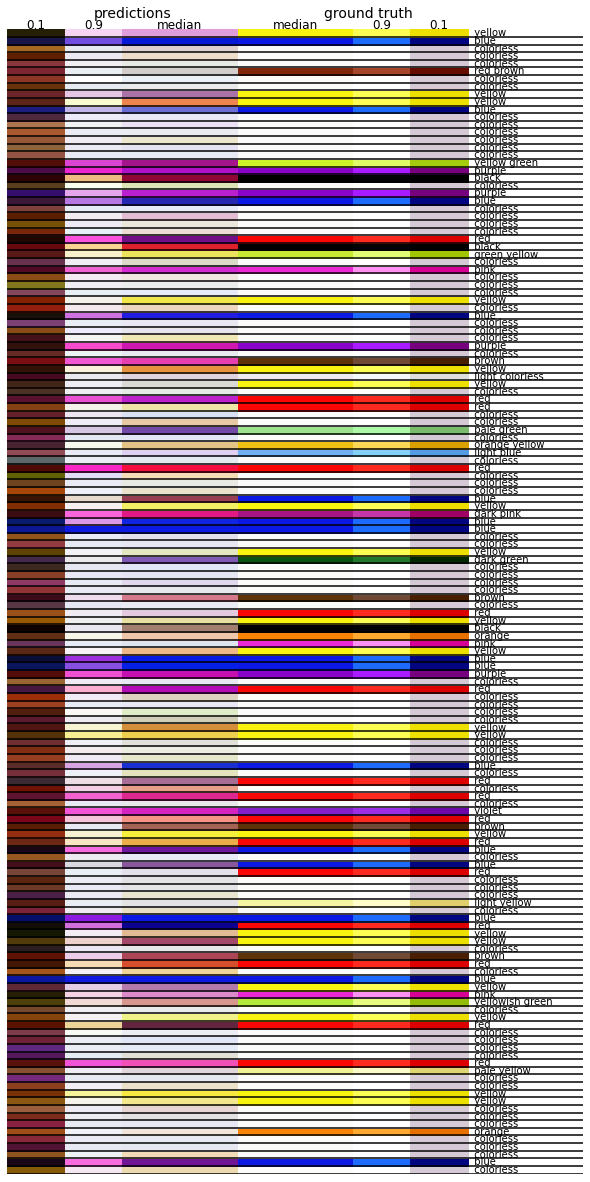

In [36]:
plot_prediction_dist(quantile01_prediction * 255, 
                     median_prediction * 255, 
                     quantile09_prediction * 255,
                     names,
                     augmentation_dict, 
                     150,
                     outname='../results/color_examples.pdf'
                    )

/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/colorml/utils/utils.py:409: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


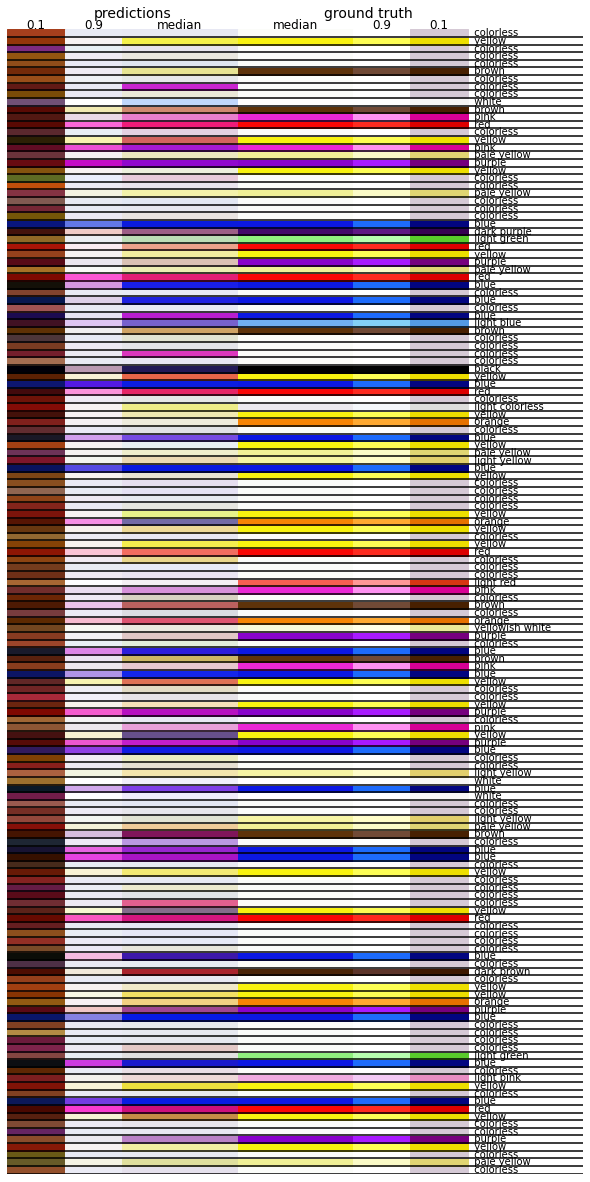

In [37]:
plot_prediction_dist(quantile01_prediction_train * 255, 
                     median_prediction_train * 255, 
                     quantile09_prediction_train * 255,
                     train_names,
                     augmentation_dict, 
                     150,
                     outname='../results/color_examples_train.pdf'
                    )

In [38]:
from colorml.utils.utils import get_delta_e, pairwise_delta_es

### Calculate baseline colordistances from the survey

In [39]:
color_delta_es = {}
means = []

for k,v in augmentation_dict.items():
    colors = len(v)
    meanc = []
    for i in range(colors):
        for j in range(colors): 
            if j>i: 
                meanc.append(get_delta_e(v[i], v[j], upscaled=True))
    color_delta_es[k] = meanc
    means.extend(meanc)

In [40]:
color_delta_es_from_med = {}
means_from_med = []

for k,v in augmentation_dict.items():
    colors = len(v)
    meanc = []
    median_c = np.median(v, axis=0)
    for i in range(colors):
        meanc.append(get_delta_e(v[i], median_c, upscaled=True))
    color_delta_es_from_med[k] = meanc
    means_from_med.extend(meanc)

In [41]:
color_delta_es_from_med

{'amaranthine': [6.782101121922207,
  16.927078279288818,
  11.79361713112205,
  12.257797512526386,
  16.320861063757253,
  20.98880665074113,
  4.619656236323295],
 'amber': [15.33443682098492,
  2.2162683268186982,
  12.867207009317886,
  9.69231726874521,
  42.846810837949256,
  5.478758720002944,
  6.717346851592113,
  13.841990060675762,
  16.4482966963027,
  7.6687550843048005,
  19.324307890356422,
  7.887859637009003,
  3.0694600569939308,
  13.700530387893268,
  2.492019485354656,
  17.029126416729106,
  10.539501459941611,
  13.914848923357745,
  20.686326636216048,
  11.18451625767244,
  11.543339440922683,
  18.941049582431397,
  7.636627309932351,
  32.40095422361967,
  12.348785039390863,
  10.062214085646904],
 'aquamarine': [17.40555036626667,
  21.107642364324057,
  16.852249033465462,
  13.424899500953252,
  19.631306204518495,
  34.26449380125778,
  12.229334183862434,
  22.37705663626802,
  10.949397610307075,
  28.221808294755576,
  22.416694519335955,
  41.086540

In [52]:
color_delta_es_medians = {}

for k, v in color_delta_es.items():
    color_delta_es_medians[k] = np.median(v)

In [53]:
smaller_5 = (np.array(list(color_delta_es_medians.values())) < 5)

In [54]:
5/len(color_delta_es_medians) * 100

3.571428571428571

In [55]:
np.array(list(color_delta_es_medians.keys()))[smaller_5]

array(['black', 'red', 'white', 'whiteish colorless', 'yellow'],
      dtype='<U18')

In [56]:
np.mean(means)

12.10887233993671

In [57]:
np.median(means)

9.830288903449254

In [18]:
differences = pairwise_delta_es(median_prediction, y_test)

In [1]:
len(np.where(np.array(differences) > 30)[0]) / len(differences) * 100

NameError: name 'np' is not defined

In [60]:
np.median(differences)

11.024434842473047

In [61]:
import seaborn as sns

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams['font.family'] = 'sans-serif'

In [69]:
dummy_median = joblib.load('../results/dummy_median.joblib')
dummy_mean = joblib.load('../results/dummy_mean.joblib')

In [70]:
dummy_median_prediction = dummy_median.predict(X_test)
dummy_mean_prediction = dummy_mean.predict(X_test)

In [71]:
dummy_median_differences = pairwise_delta_es(dummy_median_prediction, y_test)
dummy_mean_differences = pairwise_delta_es(dummy_mean_prediction, y_test)

In [72]:
current_palette = sns.color_palette()

In [73]:
colors = ["#1b9e77", "#d95f00", "#746fb3", "#9dc721"] # colorbrewer

In [74]:
np.array(dummy_median_differences).mean()

28.588659452720503

/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


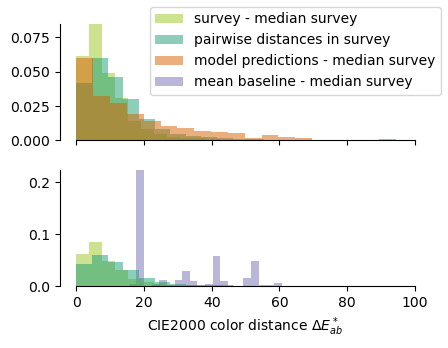

In [75]:
fig, ax = plt.subplots(2,1, figsize=(4.5,3.5), sharex=True)

ax[0].hist(means_from_med, density=True, alpha=.5, label='survey - median survey', bins=20, color=colors[-1])
ax[0].hist(means, density=True, alpha=.5, label='pairwise distances in survey', bins=20, color=colors[0])
ax[0].hist(differences, density=True, alpha=.5, label='model predictions - median survey', bins=20, color=colors[1])

ax[1].hist(dummy_mean_differences, density=True, alpha=.5, label='mean baseline - median survey', bins=20, 
           color=colors[2])
ax[1].hist(means_from_med, density=True, alpha=.5, label='_nolegend_', bins=20, color=colors[-1])
ax[1].hist(means, density=True, alpha=.5, label='_nolegend_', bins=20, color=colors[0])
#ax.hist(dummy_mean_differences, density=True, alpha=.5, label='mean baseline  - median survey', bins=20)


for a in ax:
    a.spines['top'].set_color('none')
    a.spines['right'].set_color('none')
    a.spines['left'].set_smart_bounds(True)
    a.spines['bottom'].set_smart_bounds(True)

ax[1].set_xlabel(r'CIE2000 color distance $\Delta E^*_{ab}$')
fig.legend()

fig.tight_layout()

fig.savefig('../results/delta_e_plot.pdf', bbox_inches='tight')

## Get the incorrect names

In [23]:
test_refcodes =  df['refcode'][test_indices_in_df].values

In [20]:
incorrect_indices = np.where(np.array(differences) > 30)[0]

In [46]:
test_refcodes[np.argpartition(X_test[:,121], -5)[-5:]]

array(['LOQSOA', 'HAJPEQ', 'IWOKUC', 'FAGMOS', 'FAGMEI'], dtype=object)

In [32]:
test_refcodes[X_test[:,103].argmin()]

'ACIBIY'

In [43]:
np.argwhere(np.array(CHEMICAL_FEATURES)=='logP_sum')

array([[121]])

In [24]:
for incorrect_index in incorrect_indices: 
    print(test_refcodes[incorrect_index], test_names[incorrect_index], median_prediction[incorrect_index] * 255)

SOQHIR01 orange [240.46652361 231.79490031 218.07070011]
FEVDER red [243.85502487  80.06788957 183.54086822]
IZOWEA red [98.94224525 36.11214631 63.93312622]
YORLEY yellowish green [215.46511851 150.39869723 142.59126647]
PUPYAA yellow [180.69278705 123.26535193 170.48043943]
PULDOQ yellow [162.8222986   73.94427591 105.01818976]
GAMXAV red [ 13.59582955 -19.94153912 144.05642291]
LADKEJ red [228.89664422 225.23646825 235.67444766]
NEGMUI red [235.39891113 174.74500014  72.24134961]
FIFMIS red [222.57753734  40.67043351 143.28908975]
GIVHIC red [168.54551568 109.9492347  148.48358556]
MAGBUT01 yellow [213.52626524 142.43423542  58.01185743]
POHWIU red [180.08057537  12.22956848 182.07525295]
FOLLEZ pink [223.93291129 229.74407626 239.87627054]
GARMAQ black [163.91317354 127.4177777  114.18853388]
DOMKEX red [228.90632769 202.91867351 222.16468953]
DOZCEC brown [213.3418202  120.42693838 140.45251247]
XEQGAC dark green [127.02244162  90.16312033 180.86374511]
KABXAO blue [151.90673182  